# Лабораторная работа 5.5
## Компьютерная сцинтилляционная $\gamma$-спектрометрия

Подключаем необходимые библиотеки

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math as m

Определим функции

In [3]:
#Фитирующая функция
def fiter(x, par_a, par_b, par_c, line_a, line_b):
        return par_a*x*x + par_b*x + par_c + line_a*x + line_b
#Значение аргумента в макс. функции
def max_n(par_a, par_b, line_a):
    return -(par_b + line_a) / (2*par_a)
#Определение ширины пика на середине высоты
def delta_n(n_na, *popt):
    max_y = fiter(n_na, *popt)
    mid_y = max_y / 2
    aa = par_a
    bb = par_b + line_a
    cc = par_c + line_b - mid_y
    D = bb**2 - 4*aa*cc
    x1 = (-bb + D**(0.5))/(2 * aa)
    x2 = (-bb - D**(0.5))/(2 * aa)
    return x2 - x1
#Определитель
def det(a, b, c, d):
    return a*d - b*c
#Линия
def line_y(x, alpha, beta):
    return alpha*x + beta
def line_x(y, alpha, beta):
    return (y - beta) / alpha

## Измерение фона 

Считываем данные и строим график.

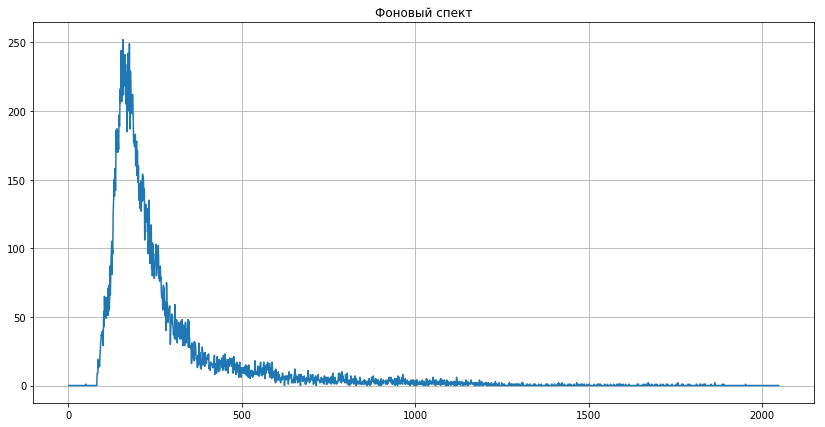

In [4]:
#Считываем данные
data = pd.read_table("data/Background.csv", header=5)
x = np.array(data['Channel'])
y = np.array(data['Counts'])
#Строим график
plt.figure(figsize=(14,7))
plt.title("Фоновый спект")
plt.grid()
plt.plot(x, y)

Как мы видим на графике присутствует только фоновый пик.

## $Na_{22}$

Считываем результаты и строим график.

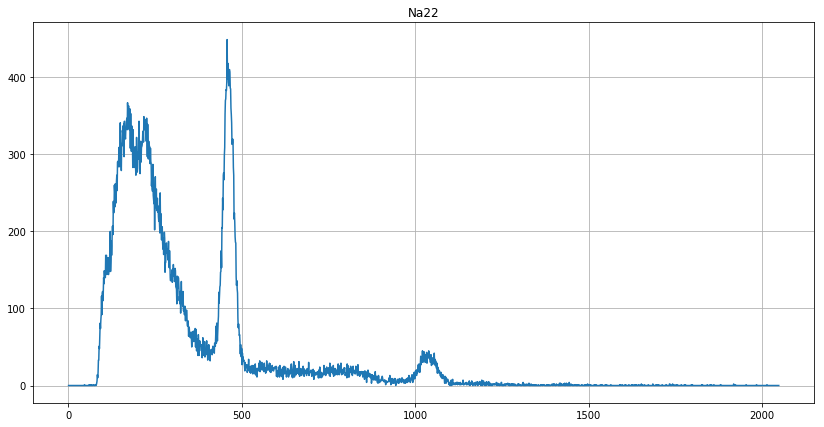

In [5]:
#Считываем данные
data = pd.read_table("data/Na.csv", header=5)
x = np.array(data['Channel'])
y = np.array(data['Counts'])
#Строим график
plt.figure(figsize=(14,7))
plt.title("Na22")
plt.grid()
plt.plot(x, y)

Рассмотрим подробнее пик полного поглащения.

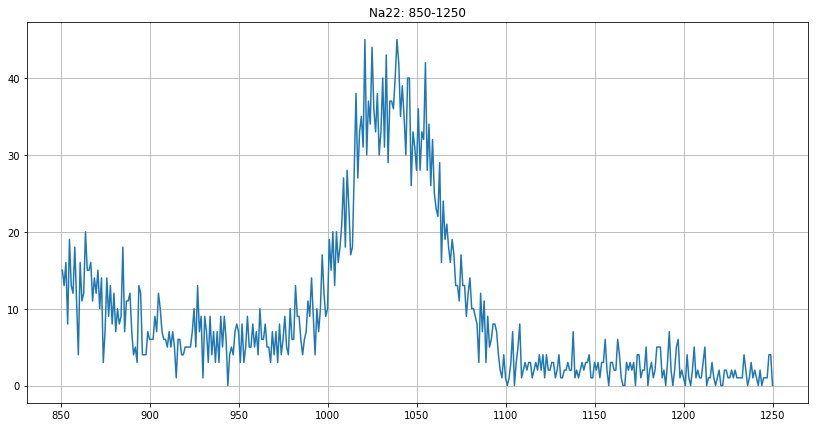

In [6]:
#Строим график
start, stop = 850, 1250
plt.figure(figsize=(14,7))
plt.title("Na22: " + str(start) + "-" + str(stop))
plt.grid()
plt.plot(x[start:stop], y[start:stop])

Приблизим пик фитирующей функцией

<ErrorbarContainer object of 3 artists>

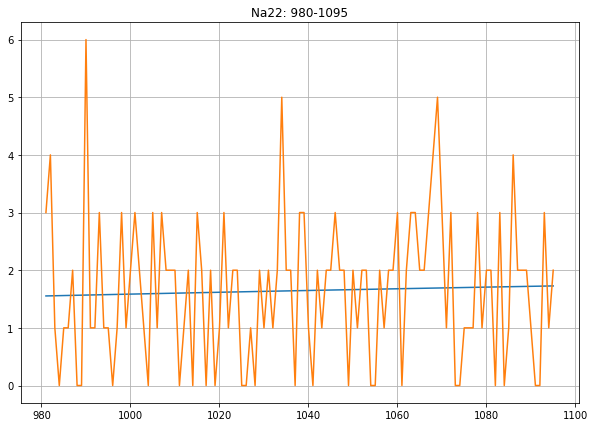

In [48]:
#Фитируем данные
start, stop = 980, 1095
result = curve_fit(f = fiter, xdata=x[start:stop], ydata=y[start:stop])
popt, pcov = result
par_a, par_b, par_c, line_a, line_b = popt
#Строим график
plt.figure(figsize=(10,7))
plt.title("Na22: " + str(start) + "-" + str(stop))
plt.grid()
plt.plot(x[start:stop], fiter(x[start:stop], *popt))
plt.errorbar(x[start:stop], y[start:stop])

По параметрам фитирующей функции найдем точку максимума и ширину пика.

In [8]:
#Находим максимум и ширину пика
n_na = max_n(par_a, par_b, line_a)
delta_n_na = delta_n(n_na, *popt)
print(n_na, delta_n_na)

1037.2983248712824 79.04056567037105


## $Cs_{137}$

Аналогично определим максимум и ширину пика.

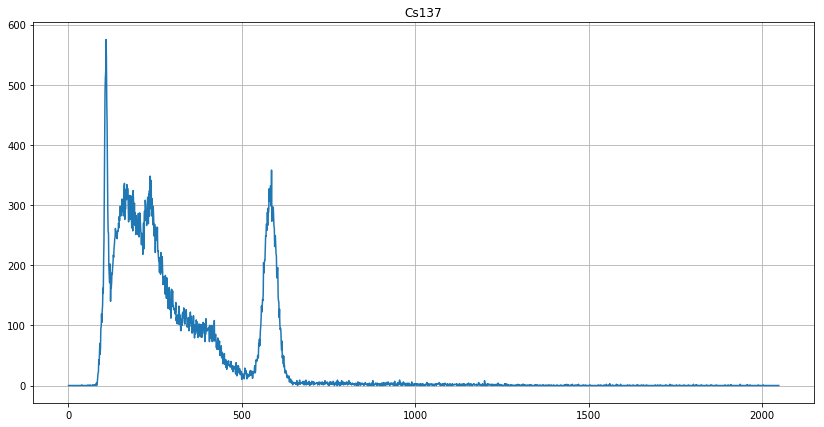

In [9]:
#Считываем данные
data = pd.read_table("data/Cs.csv", header=5)
x = np.array(data['Channel'])
y = np.array(data['Counts'])
#Строим график
plt.figure(figsize=(14,7))
plt.title("Cs137")
plt.grid()
plt.plot(x, y)

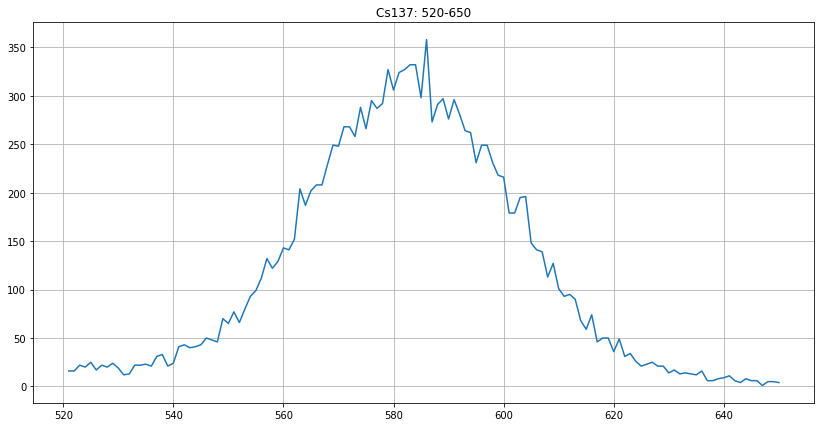

In [10]:
#Строим график
start, stop = 520, 650
plt.figure(figsize=(14,7))
plt.title("Cs137: " + str(start) + "-" + str(stop))
plt.grid()
plt.plot(x[start:stop], y[start:stop])

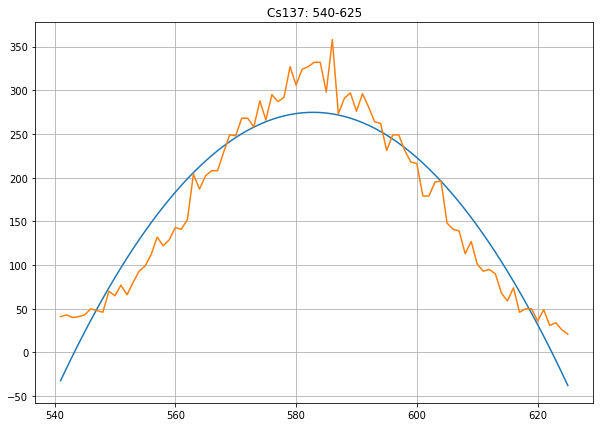

In [11]:
#Фитируем данные
start, stop = 540, 625
result = curve_fit(f=fiter, xdata=x[start:stop], ydata=y[start:stop])
popt, pcov = result
par_a, par_b, par_c, line_a, line_b = popt
#Строим график
plt.figure(figsize=(10,7))
plt.title("Cs137: " + str(start) + "-" + str(stop))
plt.grid()
plt.plot(x[start:stop], fiter(x[start:stop], *popt))
plt.plot(x[start:stop], y[start:stop])

In [12]:
#Находим максимум и ширину пика
n_cs = max_n(par_a, par_b, line_a)
delta_n_cs = delta_n(n_cs, *popt)
print(n_cs, delta_n_cs)

582.8145656134344 55.93716886887046


## $Co_{60}$

Аналогично определим максимум и ширину пика.

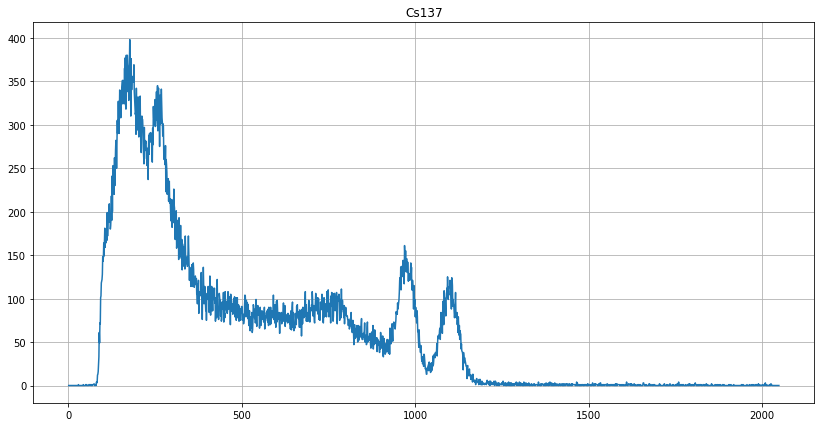

In [13]:
#Считываем данные
data = pd.read_table("data/Co.csv", header=5)
x = np.array(data['Channel'])
y = np.array(data['Counts'])
#Строим график
plt.figure(figsize=(14,7))
plt.title("Cs137")
plt.grid()
plt.plot(x, y)

### Пик 1

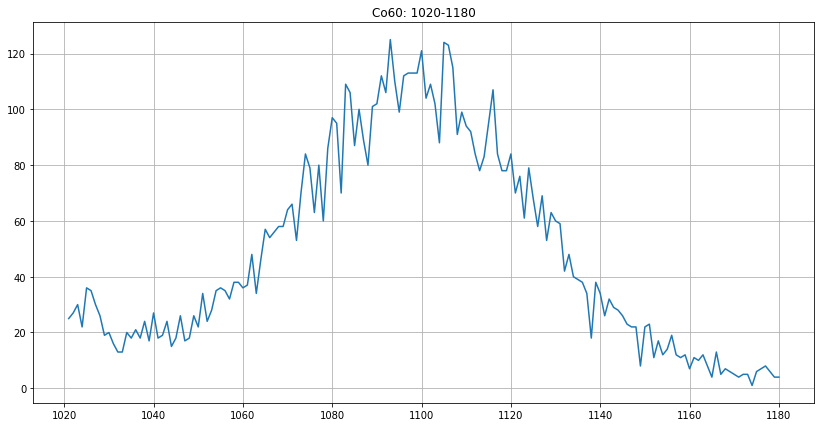

In [14]:
#Строим график
start, stop = 1020, 1180
plt.figure(figsize=(14,7))
plt.title("Co60: " + str(start) + "-" + str(stop))
plt.grid()
plt.plot(x[start:stop], y[start:stop])

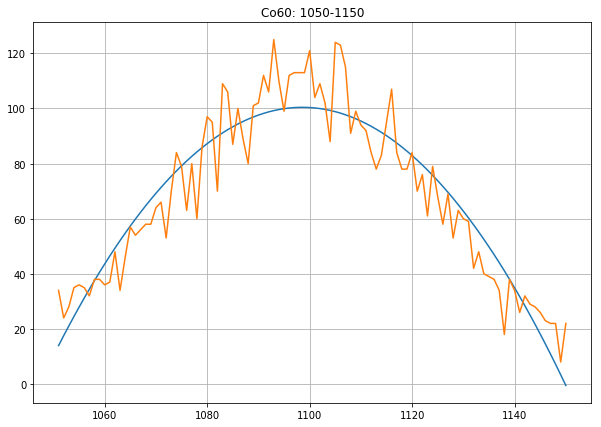

In [15]:
#Фитируем данные
start, stop = 1050, 1150
result = curve_fit(f=fiter, xdata=x[start:stop], ydata=y[start:stop])
popt, pcov = result
par_a, par_b, par_c, line_a, line_b = popt
#Строим график
plt.figure(figsize=(10,7))
plt.title("Co60: " + str(start) + "-" + str(stop))
plt.grid()
plt.plot(x[start:stop], fiter(x[start:stop], *popt))
plt.plot(x[start:stop], y[start:stop])

In [16]:
#Находим максимум и ширину пика
n_co_1 = max_n(par_a, par_b, line_a)
delta_n_co_1 = delta_n(n_co_1, *popt)
print(n_co_1, delta_n_co_1)

1098.5841993421677 72.52524256555171


### Пик 2

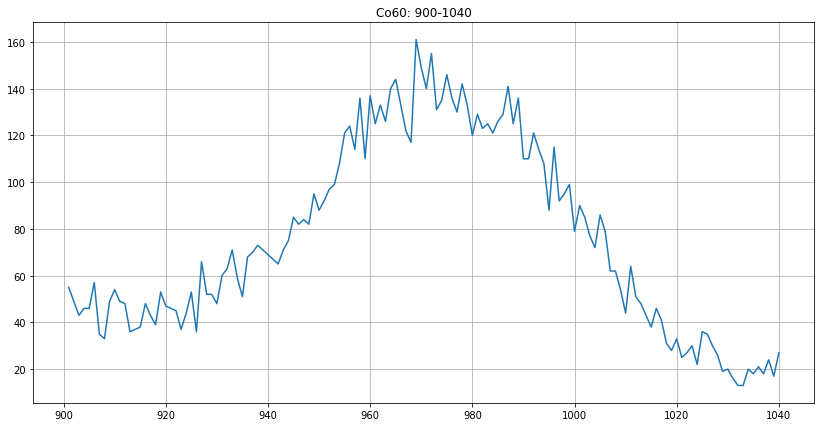

In [17]:
#Строим график
start, stop = 900, 1040
plt.figure(figsize=(14,7))
plt.title("Co60: " + str(start) + "-" + str(stop))
plt.grid()
plt.plot(x[start:stop], y[start:stop])

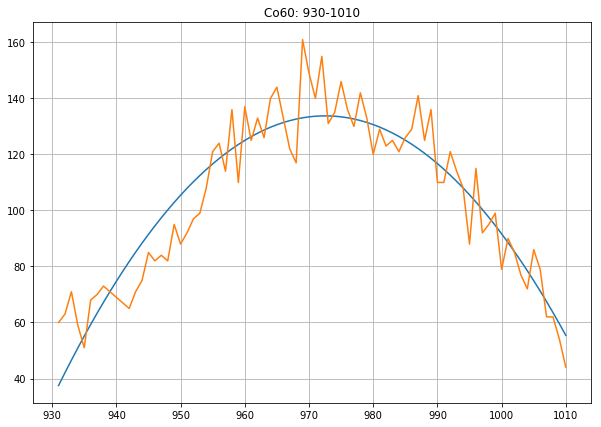

In [18]:
#Фитируем данные
start, stop = 930, 1010
result = curve_fit(f=fiter, xdata=x[start:stop], ydata=y[start:stop])
popt, pcov = result
par_a, par_b, par_c, line_a, line_b = popt
#Строим график
plt.figure(figsize=(10,7))
plt.title("Co60: " + str(start) + "-" + str(stop))
plt.grid()
plt.plot(x[start:stop], fiter(x[start:stop], *popt))
plt.plot(x[start:stop], y[start:stop])

In [19]:
#Находим максимум и ширину пика
n_co_2 = max_n(par_a, par_b, line_a)
delta_n_co_2 = delta_n(n_co_2, *popt)
print(n_co_2, delta_n_co_2)

972.5291621964753 69.23384720400463


## $Am_{241}$

Аналогично определим максимум и ширину пика.

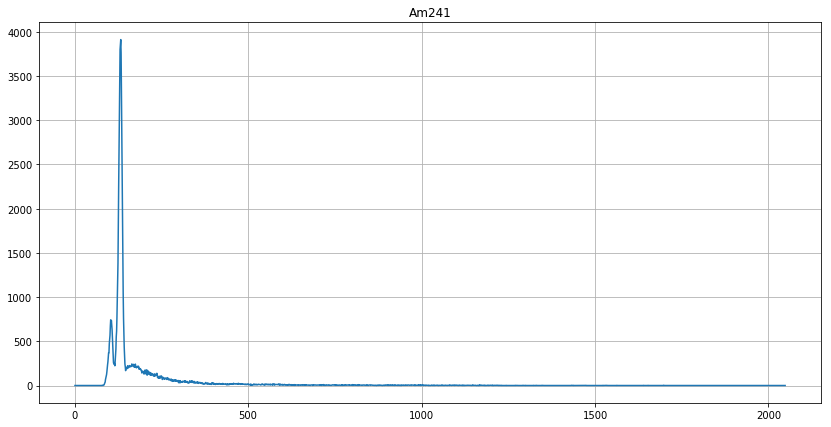

In [20]:
#Считываем данные
data = pd.read_table("data/Am.csv", header=5)
x = np.array(data['Channel'])
y = np.array(data['Counts'])
#Строим график
plt.figure(figsize=(14,7))
plt.title("Am241")
plt.grid()
plt.plot(x, y)

### Пик 1

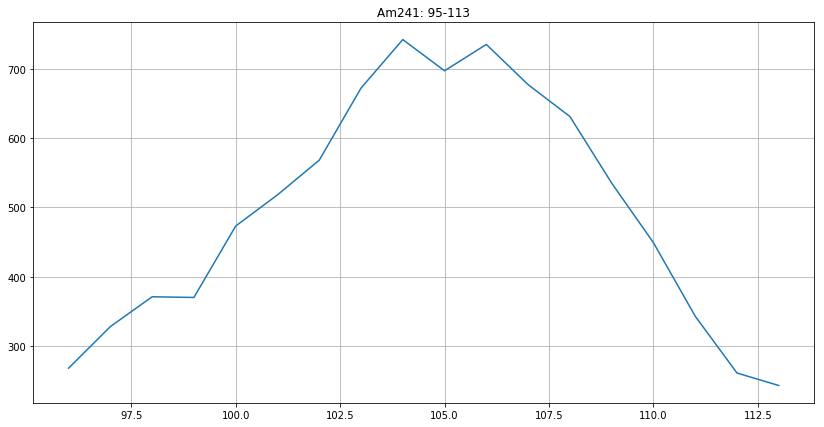

In [21]:
#Строим график
start, stop = 95, 113
plt.figure(figsize=(14,7))
plt.title("Am241: " + str(start) + "-" + str(stop))
plt.grid()
plt.plot(x[start:stop], y[start:stop])

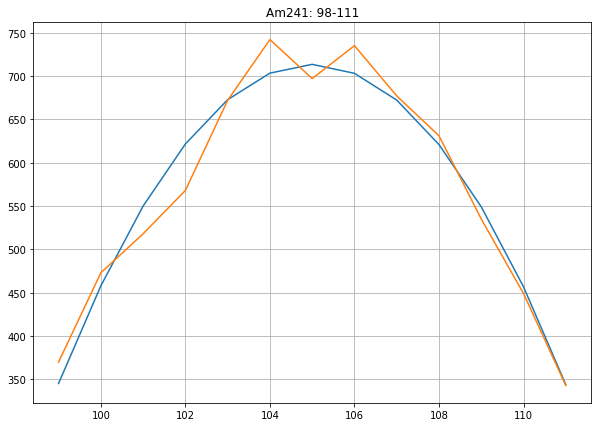

In [22]:
#Фитируем данные
start, stop = 98, 111
result = curve_fit(f=fiter, xdata=x[start:stop], ydata=y[start:stop])
popt, pcov = result
par_a, par_b, par_c, line_a, line_b = popt
#Строим график
plt.figure(figsize=(10,7))
plt.title("Am241: " + str(start) + "-" + str(stop))
plt.grid()
plt.plot(x[start:stop], fiter(x[start:stop], *popt))
plt.plot(x[start:stop], y[start:stop])

In [23]:
#Находим максимум и ширину пика
n_am_1 = max_n(par_a, par_b, line_a)
delta_n_am_1 = delta_n(n_am_1, *popt)
print(n_am_1, delta_n_am_1)

104.9941004387879 11.801547361120484


### Пик 2

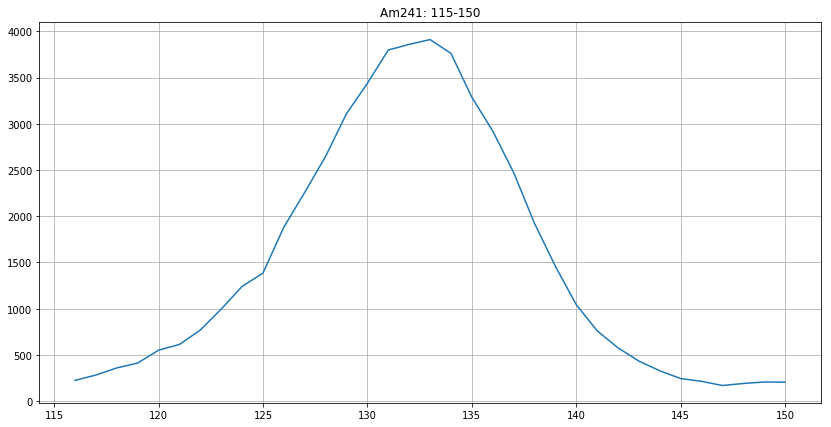

In [24]:
#Строим график
start, stop = 115, 150
plt.figure(figsize=(14,7))
plt.title("Am241: " + str(start) + "-" + str(stop))
plt.grid()
plt.plot(x[start:stop], y[start:stop])

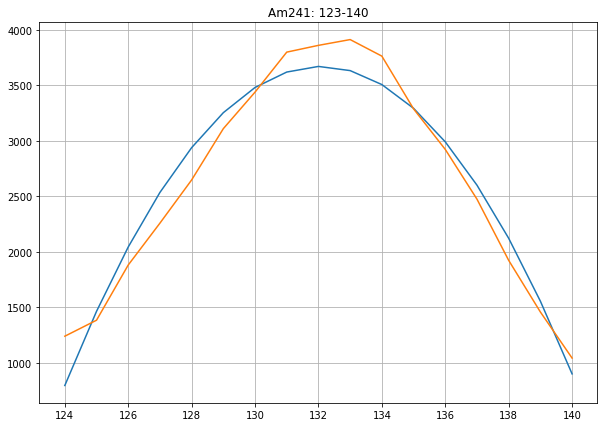

In [25]:
#Фитируем данные
start, stop = 123, 140
result = curve_fit(f=fiter, xdata=x[start:stop], ydata=y[start:stop])
popt, pcov = result
par_a, par_b, par_c, line_a, line_b = popt
#Строим график
plt.figure(figsize=(10,7))
plt.title("Am241: " + str(start) + "-" + str(stop))
plt.grid()
plt.plot(x[start:stop], fiter(x[start:stop], *popt))
plt.plot(x[start:stop], y[start:stop])

In [26]:
#Находим максимум и ширину пика
n_am_2 = max_n(par_a, par_b, line_a)
delta_n_am_2 = delta_n(n_am_2, *popt)
print(n_am_2, delta_n_am_2)

132.07421158151317 12.903917597009894


## $Eu_{152}$

Аналогично определим максимум и ширину пика.

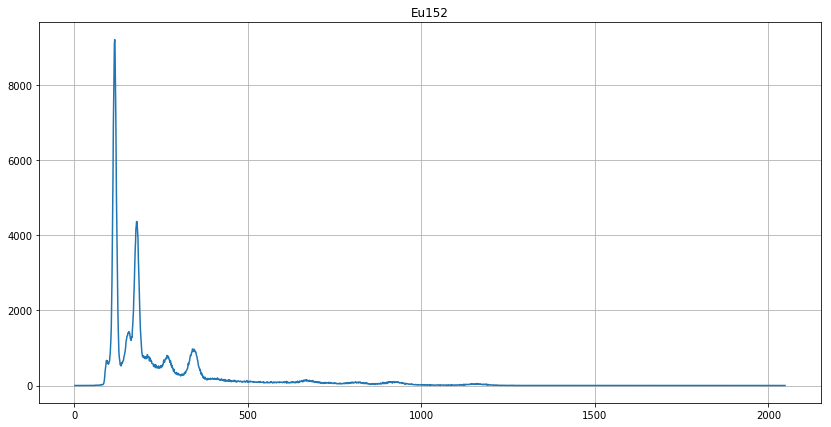

In [27]:
#Считываем данные
data = pd.read_table("data/Eu.csv", header=5)
x = np.array(data['Channel'])
y = np.array(data['Counts'])
#Строим график
plt.figure(figsize=(14,7))
plt.title("Eu152")
plt.grid()
plt.plot(x, y)

### Пик 1

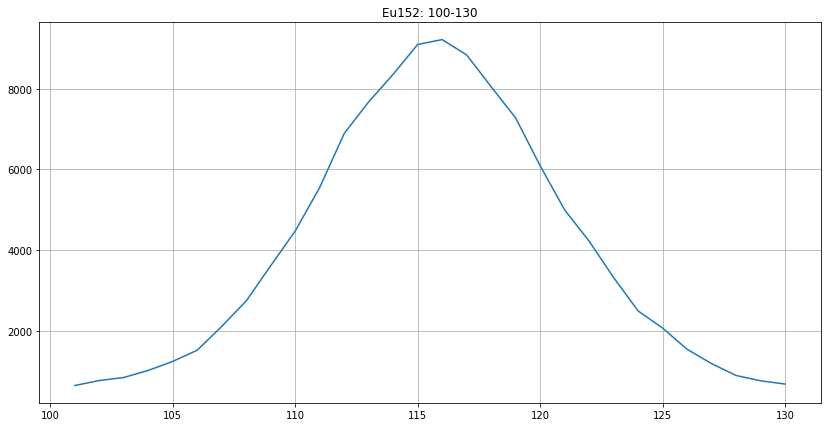

In [28]:
#Строим график
start, stop = 100, 130
plt.figure(figsize=(14,7))
plt.title("Eu152: " + str(start) + "-" + str(stop))
plt.grid()
plt.plot(x[start:stop], y[start:stop])

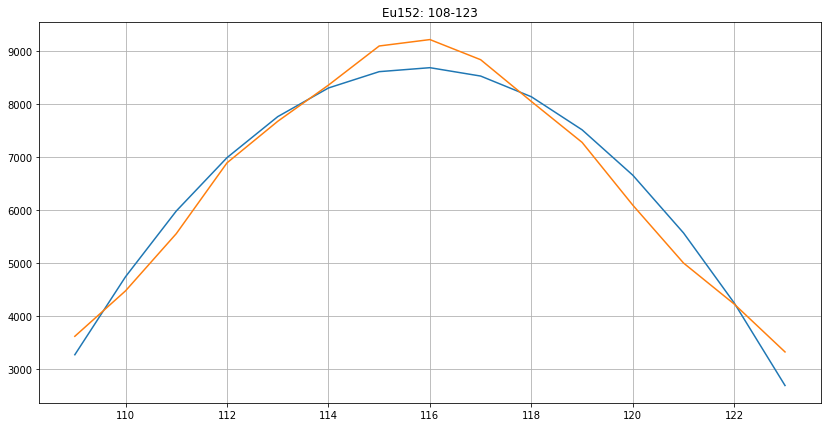

In [29]:
#Фитируем данные
start, stop = 108, 123
result = curve_fit(f=fiter, xdata=x[start:stop], ydata=y[start:stop])
popt, pcov = result
par_a, par_b, par_c, line_a, line_b = popt
#Строим график
plt.figure(figsize=(14,7))
plt.title("Eu152: " + str(start) + "-" + str(stop))
plt.grid()
plt.plot(x[start:stop], fiter(x[start:stop], *popt))
plt.plot(x[start:stop], y[start:stop])

In [30]:
#Находим максимум и ширину пика
n_eu_1 = max_n(par_a, par_b, line_a)
delta_n_eu_1 = delta_n(n_eu_1, *popt)
print(n_eu_1, delta_n_eu_1)

115.82193943653166 12.216234647903406


### Пик 2

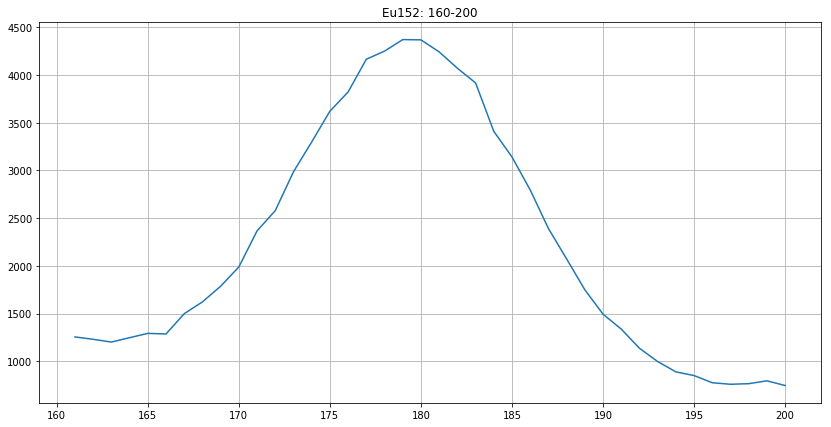

In [31]:
#Строим график
start, stop = 160, 200
plt.figure(figsize=(14,7))
plt.title("Eu152: " + str(start) + "-" + str(stop))
plt.grid()
plt.plot(x[start:stop], y[start:stop])

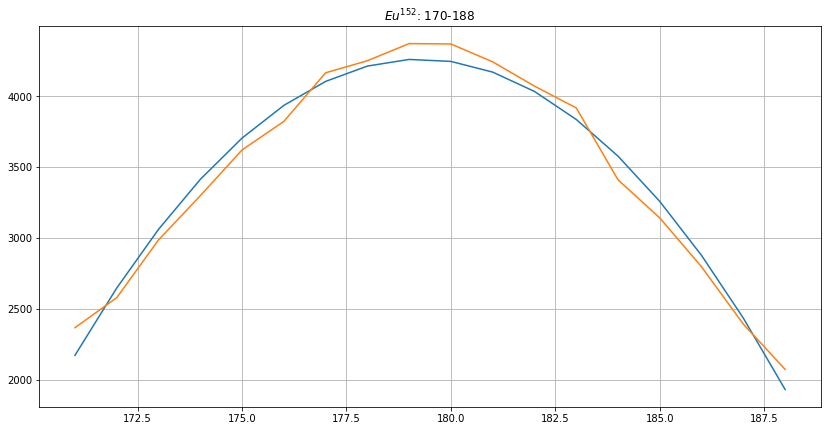

In [32]:
#Фитируем данные
start, stop = 170, 188
result = curve_fit(f=fiter, xdata=x[start:stop], ydata=y[start:stop])
popt, pcov = result
par_a, par_b, par_c, line_a, line_b = popt
#Строим график
plt.figure(figsize=(14,7))
plt.title(r"$Eu^{152}$: " + str(start) + "-" + str(stop))
plt.grid()
plt.plot(x[start:stop], fiter(x[start:stop], *popt))
plt.plot(x[start:stop], y[start:stop])

In [33]:
#Находим максимум и ширину пика
n_eu_2 = max_n(par_a, par_b, line_a)
delta_n_eu_2 = delta_n(n_eu_2, *popt)
print(n_eu_2, delta_n_eu_2)

179.26816659384235 16.697634304966584


## Определим коэффициенты для перевода каналов в энергию

Определим энергии

In [34]:
e_na = 1275
e_cs = 661.7

$N_{na} = \alpha*E_{na} + \beta$

$N_{cs} = \alpha*E_{cs} + \beta$

In [35]:
alpha = det(n_na, 1, n_cs, 1) / det(e_na, 1, e_cs, 1)
beta = det(e_na, n_na, e_cs, n_cs) / det(e_na, 1, e_cs, 1)
print(alpha, beta)

0.7410464034858112 92.46416042687318


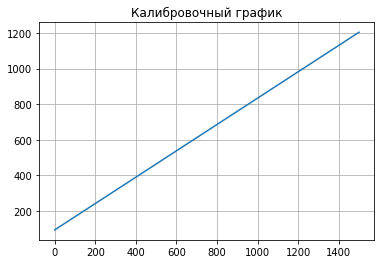

In [36]:
x = np.linspace(0, 1500, 1500)
y = alpha*x + beta

plt.title("Калибровочный график")
plt.grid()
plt.plot(x, y)

## Построем таблицу для элементов

In [37]:
Elements = ["Na22", "Cs137", 
            "Co60-1", "Co60-2", 
            "Am241-1", "Am241-2", 
            "Eu152-1", "Eu152-2"]

N = np.array([n_na, n_cs, 
              n_co_1, n_co_2, 
              n_am_1, n_am_2, 
              n_eu_1, n_eu_2])

delta_N = np.array([delta_n_na, delta_n_cs, 
              delta_n_co_1, delta_n_co_2, 
              delta_n_am_1, delta_n_am_2, 
              delta_n_eu_1, delta_n_eu_2])

E = line_x(N, alpha, beta)

delta_E = alpha*delta_N

R = delta_E / E

In [38]:
df = pd.DataFrame({
    "Источник" : Elements,
    "N_i" : N,
    "delta_N_i" : delta_N,
    "E_i" : E,
    "delta_E_i" : delta_E,
    "R_i" : R
})
print(df)

  Источник          N_i  delta_N_i          E_i  delta_E_i       R_i
0     Na22  1037.298325  79.040566  1275.000000  58.572727  0.045939
1    Cs137   582.814566  55.937169   661.700000  41.452038  0.062645
2   Co60-1  1098.584199  72.525243  1357.701804  53.744570  0.039585
3   Co60-2   972.529162  69.233847  1187.597696  51.305493  0.043201
4  Am241-1   104.994100  11.801547    16.908442   8.745494  0.517227
5  Am241-2   132.074212  12.903918    53.451513   9.562402  0.178899
6  Eu152-1   115.821939  12.216235    31.519995   9.052797  0.287208
7  Eu152-2   179.268167  16.697634   117.137072  12.373722  0.105635


### Построем график для проверки зависимости

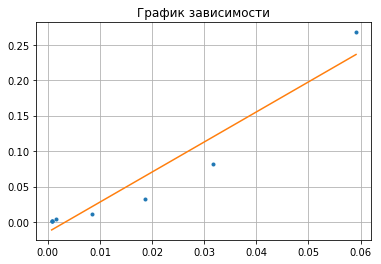

In [46]:
X = np.sort(1 / E)
Y = np.sort(R**2) 

def line(x, a, b):
    return a*x + b

result = curve_fit(f=line,xdata=X, ydata=Y)
popt, pcov = result
a, b = popt
Y_line = line(X, a, b)
plt.title("График зависимости")
plt.grid()
plt.plot(X, Y, '.')
plt.plot(X, Y_line)
plt.show()

По набору эксперементальных данных мы видим, что зависимость выполняется.

## Сравним Cs с образцом с другой установки

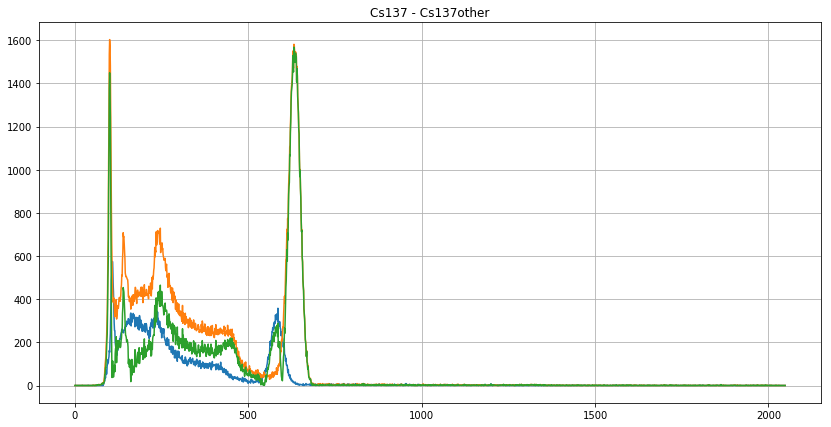

In [47]:
# Считываем данные
data = pd.read_table("data/Cs_other_2.csv", header=5)
x_other = np.array(data['Channel'])
y_other = np.array(data['Counts'])
data = pd.read_table("data/Cs.csv", header=5)
x = np.array(data['Channel'])
y = np.array(data['Counts'])

#Строим график
plt.figure(figsize=(14,7))
plt.title("Cs137 - Cs137other")
plt.grid()
plt.plot(x, y)
plt.plot(x_other, y_other)
plt.show()

Смещения достигаются за счет разной настройки каналов, а изменение максимумов за счёт разных диаметров сенсоров.